In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import torch.utils as utils
import torch.utils.data as data_utils

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


# 데이터 불러오기 및 변환

In [104]:
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['const'] = np.ones(data.shape[0])

In [105]:
display(data.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.0


In [107]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [108]:
y = pd.DataFrame(boston.target)

In [109]:
y = scaler.fit_transform(y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data.astype(float), y.astype(float), test_size = 0.3, random_state = 1234)

In [148]:
# change into tensor

tensor_x_train = torch.from_numpy(X_train).to(DEVICE)
tensor_y_train = torch.from_numpy(y_train).to(DEVICE)
tensor_x_test = torch.from_numpy(X_test).to(DEVICE)
tensor_y_test = torch.from_numpy(y_test).to(DEVICE)

In [112]:
# tensor_x_train = torch.from_numpy(X_train)
# tensor_y_train = torch.from_numpy(y_train)

# train_dataset = data_utils.TensorDataset(tensor_x_train, tensor_y_train)
# train_loader = data_utils.DataLoader(train_dataset, pin_memory = True)

In [113]:
# tensor_x_test = torch.from_numpy(X_test)
# tensor_y_test = torch.from_numpy(y_test)

# test_dataset = data_utils.TensorDataset(tensor_x_test, tensor_y_test)
# test_loader = data_utils.DataLoader(test_dataset, pin_memory = True)

# Regression Example

In [158]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(14, 1)
    
    def forward(self, x):
        return self.linear(x)

regressor = LinearRegressionModel()

In [159]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(regressor):,} trainable parameters. \n')

print(regressor)
print(list(regressor.parameters()))

The model has 15 trainable parameters. 

LinearRegressionModel(
  (linear): Linear(in_features=14, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.2235, -0.0552,  0.1554,  0.0281, -0.1812, -0.1039,  0.1096,  0.1491,
          0.1639, -0.1966, -0.1128, -0.1616,  0.2350,  0.1583]],
       requires_grad=True), Parameter containing:
tensor([0.0410], requires_grad=True)]


In [160]:
criterion = nn.MSELoss()
optimizer = optim.SGD(regressor.parameters(), lr = 0.01)

In [161]:
regressor.to(DEVICE)
criterion.to(DEVICE)

print('==> Start Training ...')

train_loss = []

for epoch in range(10000):

    optimizer.zero_grad()
    outputs = regressor(tensor_x_train.float())
    loss = criterion(outputs, tensor_y_train.float())
    
    loss.backward()
    optimizer.step()
    
    if epoch%50==0 :
        print('epoch {}, loss {}'.format(epoch, loss.data))
        train_loss.append(loss.data)
    
print('==> Finished Training')

==> Start Training ...
epoch 0, loss 1.405575156211853
epoch 50, loss 0.3962398171424866
epoch 100, loss 0.3085697889328003
epoch 150, loss 0.28584185242652893
epoch 200, loss 0.2761172652244568
epoch 250, loss 0.2706293761730194
epoch 300, loss 0.26714828610420227
epoch 350, loss 0.2648247182369232
epoch 400, loss 0.26323196291923523
epoch 450, loss 0.2621217370033264
epoch 500, loss 0.261338472366333
epoch 550, loss 0.26078057289123535
epoch 600, loss 0.26037999987602234
epoch 650, loss 0.2600901126861572
epoch 700, loss 0.25987887382507324
epoch 750, loss 0.2597237825393677
epoch 800, loss 0.25960904359817505
epoch 850, loss 0.2595234811306
epoch 900, loss 0.2594590187072754
epoch 950, loss 0.2594100832939148
epoch 1000, loss 0.2593725323677063
epoch 1050, loss 0.25934335589408875
epoch 1100, loss 0.2593204975128174
epoch 1150, loss 0.2593022882938385
epoch 1200, loss 0.25928765535354614
epoch 1250, loss 0.25927576422691345
epoch 1300, loss 0.2592659592628479
epoch 1350, loss 0.2592

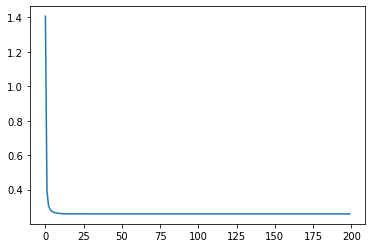

In [163]:
plt.plot(np.arange(len(train_loss)), train_loss)
plt.show()

In [186]:
from sklearn.metrics import r2_score

r2_score(regressor(tensor_x_test.float()).data[:,0].cpu().numpy(), tensor_y_test.float().data[:,0].cpu().numpy())

0.6272136641323804